# Tutorial for Data

이 Notebook에는 참가자 분들께서 kspace, image data를 보다 쉽게 분석하실 수 있도록 간단한 시각화 예제를 첨부하였습니다.

## Setup

아래 코드를 실행하기 전, 필요한 module을 import합니다.

In [4]:
# Set up the environment for running a Python script that uses OpenCV and other libraries
!apt update
!apt install -y libgl1

# Install necessary Python packages
%pip install numpy matplotlib h5py opencv-python

Reading package lists... Done
E: Could not open lock file /var/lib/apt/lists/lock - open (13: Permission denied)
E: Unable to lock directory /var/lib/apt/lists/
W: Problem unlinking the file /var/cache/apt/pkgcache.bin - RemoveCaches (13: Permission denied)
W: Problem unlinking the file /var/cache/apt/srcpkgcache.bin - RemoveCaches (13: Permission denied)
E: Could not open lock file /var/lib/dpkg/lock-frontend - open (13: Permission denied)
E: Unable to acquire the dpkg frontend lock (/var/lib/dpkg/lock-frontend), are you root?
Note: you may need to restart the kernel to use updated packages.


In [4]:
import os
import h5py
import numpy as np
from pathlib import Path

def get_low_freq_len(mask_1d):
    """
    중앙에서 연속된 1의 길이를 계산 (저주파 영역)
    """
    center = len(mask_1d) // 2
    count = 0
    # 중앙에서 양쪽으로 확장하면서 연속된 1의 개수를 셈
    for i in range(center, len(mask_1d)):
        if mask_1d[i] == 1:
            count += 1
        else:
            break
    for i in range(center - 1, -1, -1):
        if mask_1d[i] == 1:
            count += 1
        else:
            break
    return count

# 디렉토리 경로
kspace_dir = Path("../Data/train/kspace")
h5_files = sorted(kspace_dir.glob("*.h5"))

for h5_file in h5_files:
    try:
        with h5py.File(h5_file, 'r') as f:
            mask = np.array(f['mask'])  # numpy 배열로 변환

            # 1D 혹은 2D 처리
            if mask.ndim == 2:
                # (num_slices, num_cols) → 첫 슬라이스 기준
                mask_1d = mask[0]
            else:
                mask_1d = mask

            ones = np.sum(mask_1d == 1)
            zeros = np.sum(mask_1d == 0)
            low_freq_len = get_low_freq_len(mask_1d)

            print(f"{h5_file.name} | shape: {mask.shape} | 1s: {ones}, 0s: {zeros}, low_freq_len: {low_freq_len}")

    except Exception as e:
        print(f"[ERROR] {h5_file.name}: {e}")

brain_acc4_1.h5 | shape: (396,) | 1s: 123, 0s: 273, low_freq_len: 33
brain_acc4_10.h5 | shape: (396,) | 1s: 123, 0s: 273, low_freq_len: 33
brain_acc4_100.h5 | shape: (396,) | 1s: 123, 0s: 273, low_freq_len: 33
brain_acc4_11.h5 | shape: (396,) | 1s: 123, 0s: 273, low_freq_len: 33
brain_acc4_12.h5 | shape: (396,) | 1s: 123, 0s: 273, low_freq_len: 33
brain_acc4_13.h5 | shape: (396,) | 1s: 123, 0s: 273, low_freq_len: 33
brain_acc4_14.h5 | shape: (396,) | 1s: 123, 0s: 273, low_freq_len: 33
brain_acc4_15.h5 | shape: (396,) | 1s: 123, 0s: 273, low_freq_len: 33
brain_acc4_16.h5 | shape: (396,) | 1s: 123, 0s: 273, low_freq_len: 33
brain_acc4_17.h5 | shape: (396,) | 1s: 123, 0s: 273, low_freq_len: 33
brain_acc4_18.h5 | shape: (392,) | 1s: 122, 0s: 270, low_freq_len: 33
brain_acc4_19.h5 | shape: (396,) | 1s: 123, 0s: 273, low_freq_len: 33
brain_acc4_2.h5 | shape: (396,) | 1s: 123, 0s: 273, low_freq_len: 33
brain_acc4_20.h5 | shape: (396,) | 1s: 123, 0s: 273, low_freq_len: 33
brain_acc4_21.h5 | sh

In [3]:
import os
import h5py
import numpy as np
from pathlib import Path
from collections import defaultdict, Counter

def get_low_freq_len(mask_1d):
    center = len(mask_1d) // 2
    count = 0
    for i in range(center, len(mask_1d)):
        if mask_1d[i] == 1:
            count += 1
        else:
            break
    for i in range(center - 1, -1, -1):
        if mask_1d[i] == 1:
            count += 1
        else:
            break
    return count

def analyze_masks(dataset_name, files):
    shape_counter = Counter()
    ones_counter = Counter()
    zeros_counter = Counter()
    low_freq_counter = Counter()

    for h5_file in files:
        try:
            with h5py.File(h5_file, 'r') as f:
                mask = np.array(f['mask'])

                if mask.ndim == 2:
                    mask_1d = mask[0]
                else:
                    mask_1d = mask

                shape_len = mask_1d.shape[0]
                ones = int(np.sum(mask_1d == 1))
                zeros = int(np.sum(mask_1d == 0))
                low_freq_len = get_low_freq_len(mask_1d)

                shape_counter[shape_len] += 1
                ones_counter[ones] += 1
                zeros_counter[zeros] += 1
                low_freq_counter[low_freq_len] += 1
        except Exception as e:
            print(f"[ERROR] {h5_file.name}: {e}")

    print(f"\n========== {dataset_name.upper()} SUMMARY ==========")
    print("▶ Mask Shape Length (num_cols):")
    for k, v in sorted(shape_counter.items()):
        print(f"  - {k}: {v} files")

    print("▶ # of Ones in Mask:")
    for k, v in sorted(ones_counter.items()):
        print(f"  - {k}: {v} files")

    print("▶ # of Zeros in Mask:")
    for k, v in sorted(zeros_counter.items()):
        print(f"  - {k}: {v} files")

    print("▶ Low-Frequency Length:")
    for k, v in sorted(low_freq_counter.items()):
        print(f"  - {k}: {v} files")

# 전체 파일 수집
kspace_dir = Path("../Data/train/kspace")
h5_files = sorted(kspace_dir.glob("*.h5"))
brain_files = [f for f in h5_files if "brain" in f.name]
knee_files = [f for f in h5_files if "knee" in f.name]

# 분석 실행
analyze_masks("brain", brain_files)
analyze_masks("knee", knee_files)


========== BRAIN SUMMARY ==========
▶ Mask Shape Length (num_cols):
  - 392: 9 files
  - 396: 191 files
▶ # of Ones in Mask:
  - 77: 100 files
  - 122: 3 files
  - 123: 97 files
▶ # of Zeros in Mask:
  - 270: 3 files
  - 273: 97 files
  - 315: 6 files
  - 319: 94 files
▶ Low-Frequency Length:
  - 33: 200 files

========== KNEE SUMMARY ==========
▶ Mask Shape Length (num_cols):
  - 320: 2 files
  - 322: 4 files
  - 338: 1 files
  - 356: 2 files
  - 368: 109 files
  - 372: 76 files
  - 386: 2 files
  - 388: 3 files
  - 480: 1 files
▶ # of Ones in Mask:
  - 63: 1 files
  - 64: 1 files
  - 67: 1 files
  - 72: 57 files
  - 74: 37 files
  - 77: 3 files
  - 99: 1 files
  - 100: 3 files
  - 110: 2 files
  - 114: 52 files
  - 116: 39 files
  - 121: 2 files
  - 149: 1 files
▶ # of Zeros in Mask:
  - 221: 1 files
  - 222: 3 files
  - 246: 2 files
  - 254: 52 files
  - 256: 39 files
  - 257: 1 files
  - 258: 1 files
  - 267: 2 files
  - 271: 1 files
  - 296: 57 files
  - 298: 37 files
  - 309: 2 

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import cv2

## K-space data

kspace data를 담고 있는 h5 file은 아래와 같이 `kspace`, `mask`의 2가지 key를 갖습니다.
- `kspace`: kspace data. (shape: `(slices, coils, height, width)`)
- `mask`: kspace data를 undersampling하기 위한 mask. (shape: `(width, )`)

In [7]:
in_dir = "../Data/train/kspace/brain_acc4_2.h5"
kspace_f = h5py.File(in_dir)
kspace_f.keys()

<KeysViewHDF5 ['kspace', 'mask']>

In [8]:
kspace = kspace_f['kspace']
mask = kspace_f['mask']
print(kspace.shape, mask.shape)

(16, 8, 768, 396) (396,)


이제 kspace data를 시각화 해보겠습니다.

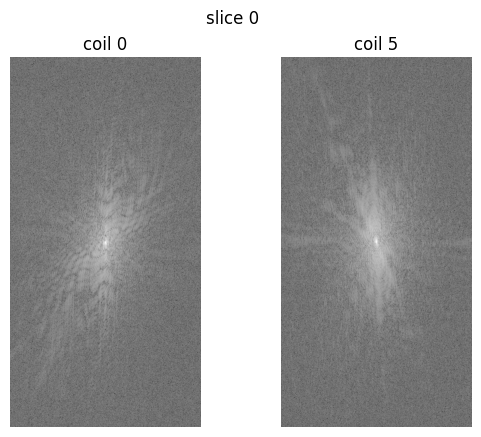

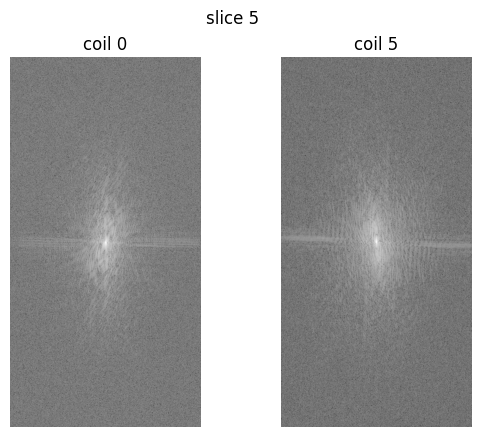

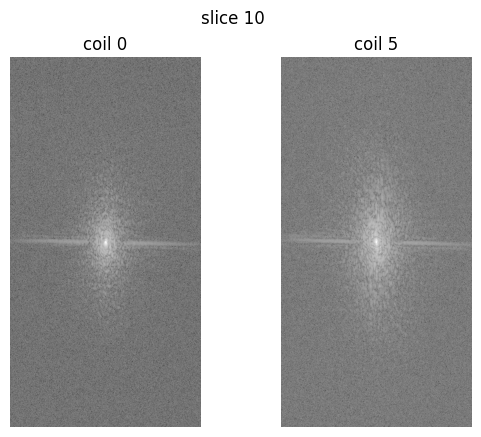

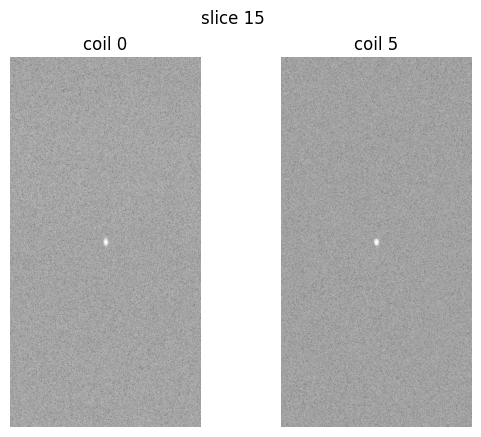

In [9]:
slice_len = kspace.shape[0]
for slice_idx in range(0, slice_len, 5):
    # convert kspace slice to real image
    kspace_slice = kspace[slice_idx]
    kspace_slice = np.log(np.abs(kspace_slice) + 1e-9)

    plt.figure()
    plt.suptitle(f'slice {slice_idx}')
    coil_len = kspace_slice.shape[0]
    for i, coil_idx in enumerate(range(0, coil_len, 5)):
        ax = plt.subplot(1, coil_len // 5 + 1, i + 1)
        plt.title(f'coil {coil_idx}')
        ax.imshow(kspace_slice[coil_idx], cmap='gray')
        plt.axis('off')  # Remove axes for a cleaner look

    plt.show()

위에서 확인하실 수 있듯, 본 challenge에서 다루는 data는 *multi-coil* data입니다. \
그러므로 하나의 slice에 대하여 서로 다른 coil로 얻어진 kspace data가 존재합니다. \
이들에 각각 inverse fourier transform을 취한 뒤, RSS(*root sum squared*) 연산을 취해 하나의 reconstruction image를 얻는 것입니다.

In [5]:
kspace_f.close()

## Image data (brain)

image data를 담고 있는 h5 file은 아래와 같이 `image_grappa`, `image_input`, `image_label`의 3가지 key를 갖습니다.
- `image_grappa`: _GRAPPA method_*를 사용하여 reconstruct한 image
- `image_input`: undersampled kspace data로부터 얻은 **aliased** image
- `image_label`: fully-sampled kspace data로부터 얻은 **aliasing free** image

각 파일에 대해, 세 이미지의 shape는 모두 `(slices, height, width)` 로 동일합니다. \
(*GRAPPA method에 관해서는 본 Challenge의 youtube channel에 설명 영상이 업로드되어 있습니다.)

In [ ]:
in_dir = "/root/Data/train/image/brain_acc4_2.h5"
image_f = h5py.File(in_dir)
image_f.keys()

<KeysViewHDF5 ['image_grappa', 'image_input', 'image_label']>

In [7]:
image_grappa = image_f['image_grappa']
image_input = image_f['image_input']
image_label = image_f['image_label']
print(image_grappa.shape, image_input.shape, image_label.shape)

(16, 384, 384) (16, 384, 384) (16, 384, 384)


이제 image data를 시각화 해보겠습니다.

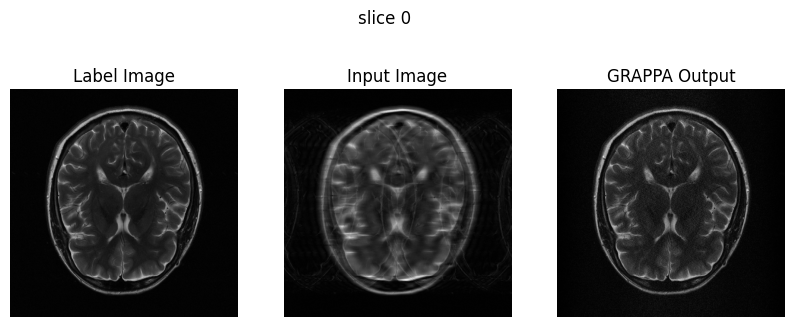

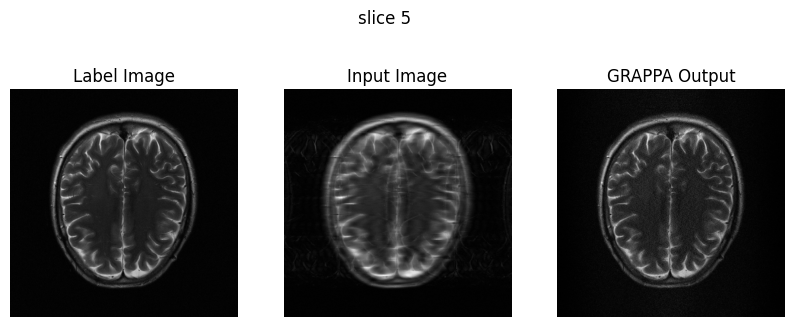

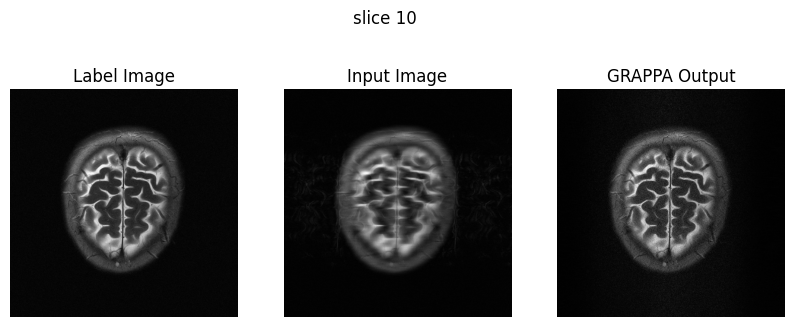

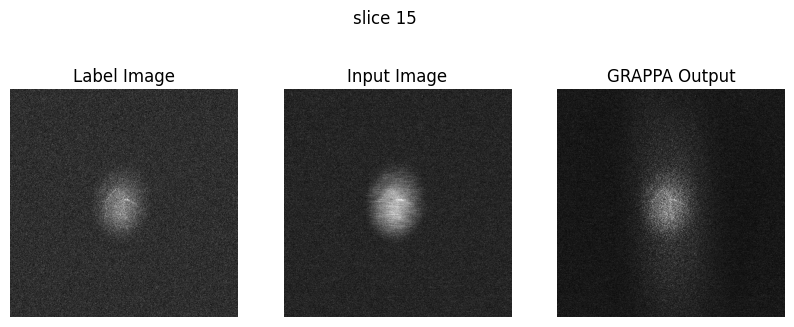

In [8]:
for slice_idx in range(0, image_label.shape[0], 5):
    plt.figure(figsize=(10, 4))
    plt.suptitle(f'slice {slice_idx}')

    ax = plt.subplot(1, 3, 1)
    plt.imshow(image_label[slice_idx], cmap='gray')
    ax.set_title('Label Image')
    ax.axis('off')

    ax = plt.subplot(1, 3, 2)
    plt.imshow(image_input[slice_idx], cmap='gray')
    ax.set_title('Input Image')
    ax.axis('off')

    ax = plt.subplot(1, 3, 3)
    plt.imshow(image_grappa[slice_idx], cmap='gray')
    ax.set_title('GRAPPA Output')
    ax.axis('off')

    plt.show()

In [13]:
image_f.close()

## Image data (knee)

knee에 대한 kspace, image data도 brain과 파일 형식, shape 등은 동일합니다.

In [ ]:
in_dir = "/root/Data/train/image/knee_acc4_1.h5"
image_f = h5py.File(in_dir)

image_grappa = image_f['image_grappa']
image_input = image_f['image_input']
image_label = image_f['image_label']

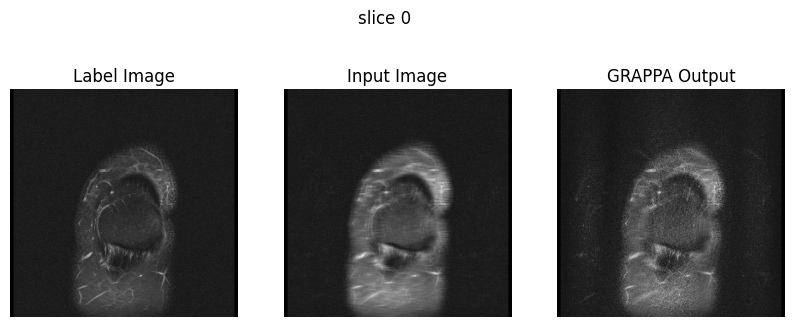

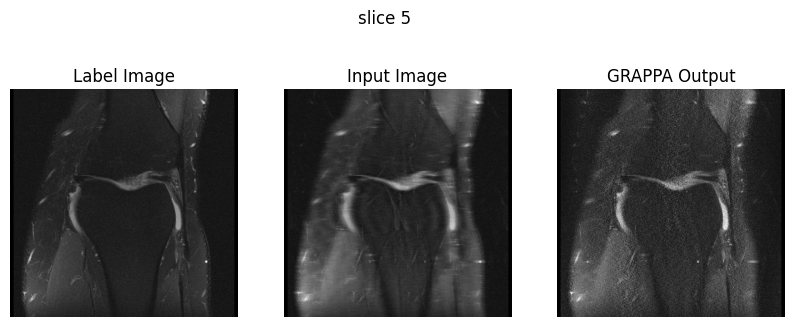

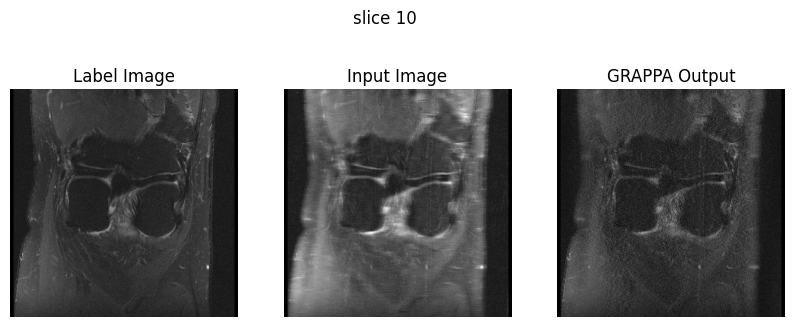

In [16]:
for slice_idx in range(0, image_label.shape[0], 5):
    plt.figure(figsize=(10, 4))
    plt.suptitle(f'slice {slice_idx}')

    ax = plt.subplot(1, 3, 1)
    plt.imshow(image_label[slice_idx], cmap='gray')
    ax.set_title('Label Image')
    ax.axis('off')

    ax = plt.subplot(1, 3, 2)
    plt.imshow(image_input[slice_idx], cmap='gray')
    ax.set_title('Input Image')
    ax.axis('off')

    ax = plt.subplot(1, 3, 3)
    plt.imshow(image_grappa[slice_idx], cmap='gray')
    ax.set_title('GRAPPA Output')
    ax.axis('off')

    plt.show()

In [17]:
image_f.close()